# LIBRARIES
* Execute this cell before going any further.
> If you run into issues with ipywidgets, run the following command in your Anaconda Prompt (Windows) or terminal (MacOS):  
> `conda install ipywidgets widgetsnbextension`  

In [1]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib widget

<br/><br/>

# Warmup

## Interactive Computing and Visualization
Being able to visualize and manipulate concepts in real time is a very powerful tool for gaining intuition about a concept or system you're working with. Throughout this assignment, we will use python to create interactive plots for just this purpose.

For the warmup, you will make your own interactive plot - this should reveal that there is nothing especially mysterious about these, and make this more accessible as a tool for your own studies.

### Multiple-Choice

You will select multiple-choice answers to (i) compute the distance between two points  
and (ii) build an interactive UI with sliders. After choosing, a helper function will check your answers, and launch an interactive plot that shows two points, the line segment between them, and the Euclidea distance.

**Recall:** The Euclidean distance between $P_1=(x_1,y_1)$ and $P_2=(x_2,y_2)$ is  
$$\sqrt{(x_1-x_2)^2 + (y_1-y_2)^2}$$.  
For a 4-slider UI with integer step 1 on $[-10,10]$, use the appropriate `widgets.interact` signature.


In [2]:
# ============================
# Choose your MC answers here
# ============================

# Q1. Which expression correctly computes the Euclidean distance between (v1_x, v1_y) and (v2_x, v2_y)?
#     (A) np.abs(v1_x - v2_x) + np.abs(v1_y - v2_y)
#     (B) (v1_x - v2_x)**2 + (v1_y - v2_y)**2
#     (C) np.sqrt((v1_x - v2_x)**2 + (v1_y - v2_y)**2)
#     (D) np.sqrt(v1_x - v2_x) + np.sqrt(v1_y - v2_y)
ANSWER_DISTANCE = 'C'  # <-- set to A/B/C/D

# Q2. Which call correctly creates an interactive UI with step=1 sliders on [-10, 10] for x1, y1, x2, y2?
#     (A) widgets.interact(distance_between_points, v1_x=(-10,10), v1_y=(-10,10), v2_x=(-10,10), v2_y=(-10,10))
#     (B) widgets.interact(distance_between_points, v1_x=(-10,10,1), v1_y=(-10,10,1), v2_x=(-10,10,1), v2_y=(-10,10,1))
#     (C) widgets.interact(distance_between_points, v1_x=[-10,10,1], v1_y=[-10,10,1], v2_x=[-10,10,1], v2_y=[-10,10,1])
#     (D) widgets.interact(distance_between_points, (-10,10,1), (-10,10,1), (-10,10,1), (-10,10,1))
ANSWER_INTERACT = 'B'  # <-- set to A/B/C/D

# After setting, run the helper function (once imported) like:
from helper import distance_mc_runner
distance_mc_runner(ANSWER_DISTANCE, ANSWER_INTERACT)

interactive(children=(IntSlider(value=0, description='v1_x', max=10, min=-10), IntSlider(value=0, description=…

<function helper.distance_mc_runner.<locals>.distance_between_points(v1_x, v1_y, v2_x, v2_y)>

<br/><br/>
<br/><br/>

# Basics of Diffraction

## PART 1 - Wave Superposition
An important principle of wave behavior is __superposition__ - When two waves combine, the resultant wave is simply their sum. Waves are not "more than the sum of their parts"—they _are_ the sum of their parts.

Because of this, any waveform can be decomposed into a sum of pure sine and cosine waves of specific frequencies. This can be done using the __Fourier Transform__, which transforms a signal from the time domain to the frequency domain.

> This descriptioin of the Fourier Transform is sufficient for our purposes.
> If you are curious about the details, check out this excellent video:
> [3Blue1Brown's Fourier Transform Explanation (YouTube)](https://www.youtube.com/watch?v=spUNpyF58BY&t=554s)

### CODE
- Implement the `waves_and_superposition()` function so that, given the frequencies and phases of two waves, it returns the tuple  
  `x, y_1, y_2, y_superposition`.

- Create an instance of `SuperpositionVisualizer` by passing your `waves_and_superposition` function to its constructor.

- Use the visualizer’s `interactive()` method to generate the interactive plots for the waves and their Fourier transform.

- Adjust the frequencies and phases with the widget sliders and observe how these parameters influence the shapes of the individual waves, their superposition, and the resulting frequency spectrum.


In [3]:
from helper import SuperpositionVisualizer

def waves_and_superposition(f1,p1,f2,p2):
    #creating list of x values for use with our functions
    x = np.linspace(0, 10, 640) 
    
    #transforming to angular frequencies for use in sine
    w1 = 2 * np.pi * f1
    w2 = 2 * np.pi * f2
    
    #write what comes after! (find y1, y2, and their superposition)

    y_1 = np.sin(w1 * x)
    y_2 = np.sin(w2 * x)
    y_superposition = y_1 + y_2
    
    return x, y_1, y_2, y_superposition

# create a SuperpositionVisualizer here and run the interactive plot
viz = SuperpositionVisualizer(waves_and_superposition)
viz.interactive() 

interactive(children=(FloatSlider(value=2.5, description='f1', max=5.0), FloatSlider(value=10.0, description='…

### SHORT RESPONSE QUESTIONS
1. How do the frequencies of the component waves relate to the frequencies observed in the Fourier transform of their superposition? Why are they related like this?
2. Does changing the phase of each wave affect this relationship?
3. How is superposition related to constructive and destructive interference?
### ANSWER

1. We observe that the frequencies we set for each component wave are the same as the frequencies observed in the fourier transform of the wave made by adding them.
2. This relationship does not change as we change the phase of each wave (*with the exception of the case where both waves have the same frequency and the phase causes complete destructive interference*).
3. Constructive and destructive interference are the two cases of wave superposition, where the components of each wave have the same or different sign respectively.

<br/><br/>

## PART 2 - Intensity vs. Amplitude and the Double Slit Experiment
The double slit experiment provides strong evidence that light behaves as a wave. 

When light passes through two closely spaced slits and illuminates a screen, the resultant pattern is _not_ the sum of the patterns from each individual slit. If light waves combine linearly, why don't light intensities? The reason lies in the nonlinear relationship between intensity and amplitude:
$$
I \propto A^2
$$
In the double slit experiment, constructive interference occurs when:
$$
d \cdot{}sin(\theta) = n\lambda
$$
where d is the distance between slits, $\theta$ is the angle relative to the perpendicular, n is any integer, and $\lambda$ is the wavelength.

Conversely, destructive interference occurs when:
$$d \cdot{}sin(\theta) = (n + \frac{1}{2})\lambda$$
Try and prove this to yourself!


### CODE
* Run the `interactive_intensity_plot()` function and explore the relationship between the intensity and amplitude of light.
* Run the `interactive_double_slit_plot()` function and explore how the light rays passing through the slit interfere as the angle changes.

In [4]:
from helper import interactive_intensity_plot
interactive_intensity_plot()

interactive(children=(IntSlider(value=600, description='wavelength', max=1000, min=200, step=10), FloatSlider(…

In [5]:
from helper import interactive_double_slit_plot
interactive_double_slit_plot()

interactive(children=(FloatSlider(value=0.0, description='theta', max=90.0, min=-90.0), Output()), _dom_classe…

### SHORT RESPONSE QUESTIONS
1. At what angles and path length differences was the greatest constructive interference observed?
2. How about for destructive interference?
3. Can you relate the path length to the position of a detector and the angle of diffraction?
4. How are these angles and distances related to the wavelength of light passing through the slits?
5. How is the relationship between light intensity and amplitude similar to the relationship between probability density and wavefunction amplitude for an electron?
### ANSWER

1. We observed constructive interference at the following angles: 0 deg, 23.7 deg, 52.7 deg
2. We observed destructive interference at the following angles: 11.6 deg, 37 deg, 90 deg
3. The path difference between the two slits is $\Delta \ell = d \sin \theta$, because the detector at angle $\theta$ sees one ray travel farther by the projection of the slit spacing onto the ray direction.
4. For the angles where constructive interference occurs, the extra path length is equal to an integer times the wavelength of the light. For the angles where destructive interference occurs, the extra path length is a half-integer multiple of wavelength.
5. It is actually the same relationship: $P(r) = \psi{}^2(r)$

<br/><br/>

## Part 3 - Diffraction
What if instead of two slits, we had hundreds or thousands? What kind of pattern would we see?

When light passes through a large number of closely spaced slits, the result is __diffraction__—a pattern of sharp, bright spots separated by complete darkness, unlike the gradual transtions between light and dark observed for the double slit experiment.

As with the double slit experiment, we constructive interference when:
$$n\lambda = d\cdot{}sin(\theta)$$

But why does this happen? The answer lies in how waves from many slits combine, which you'll explore in the next steps.

### GIVEN FUNCTIONS

* Execute the blocks containing the given functions. Don't modify these.

### CODE
* Run the `interactive_diffraction_plot()` function to explore the interference pattern from 25 light waves passing through nearby slits.

In [6]:
from helper import interactive_diffraction_plot
interactive_diffraction_plot()

interactive(children=(FloatSlider(value=0.0, description='theta', max=70.0, min=-70.0), Output()), _dom_classe…

### SHORT RESPONSE QUESTIONS
1. Why does diffraction produce much more pronounced peaks compared to two-slit interference?
2. How would the wave superposition plot (the lower image) change if we simulated an infinite number of slits instead of 25?
3. How can we determine the slit spacing for a diffraction grating if it is unknown?
### ANSWER

1. Diffraction produces more pronounced peaks because there are so many waves that, unless they are all lined up, for any given wave passing through one of the slits there is likely another wave that cancels it out. For an infinite number of slits, there _is_ another wave that cancels it out.
2. For an infinite amount of slits, there would be complete destructive interference everywhere except at the points of complete constructive interference.
3. We could pass light of a known wavelength through, measure at which angles constructive interference occurs, and use the equation $n\lambda = d\cdot{}sin(\theta)$ to calculate this value.

<br/><br/>
<br/><br/>

# X-Ray Crystallography

## Part 1 - The Crystal Lattice

To understand X-ray crystallography, we need to explore crystals themselves. While a crystal may contain septillions of atoms, we can nonetheless efficiently describe its structure using __symmetry__.

At minimum, 3D crystals exhibit __translational symmetry__ in three directions. This means we can define three vectors for which translating the lattice by any integer multiple of these vectors ($n\vec{v}$) results in the same structure.

Because of this, we can fully describe a crystal by specifying the region enclosed by these three vectors: the __unit cell__.

Crystal structures are defined by __cell parameters__, which describe the magnitudes and relative angles of these vectors. For magnitudes we use $a,b,c$ and for angles we use $\alpha,\beta,\gamma$.

Using these parameters, we classify crystals into __seven crystal systems__ and __14 Bravais lattices__.

Crystals can also exist in two dimensions, where only three cell parameters are needed: $a,b,\gamma$. We will visualize 2D lattices and explore how changing the cell parameters shapes the resulting structure.

### GIVEN FUNCTIONS

* Execute the blocks containing the given functions. Don't modify these.

### CODE
* Run the `interactive_crystal_plot()` function to explore how changing the lattice parameters of a 2D crystal results in different structures.
* Use the `two_d_crystal_lattice()` function to create examples of all four primitive two dimensional Bravais lattices ([Wikipedia](https://en.wikipedia.org/wiki/Bravais_lattice#In_2_dimensions)) and title them accordingly. 
* Your solution should call this function 4 times to display 4 different outputs.

In [7]:
from helper import interactive_crystal_plot
interactive_crystal_plot()

interactive(children=(FloatSlider(value=1.0, description='a', max=2.0, min=1.0), FloatSlider(value=1.5, descri…

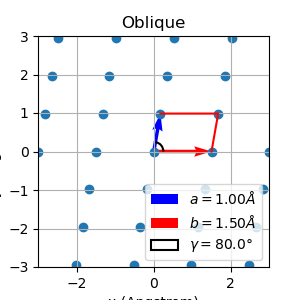

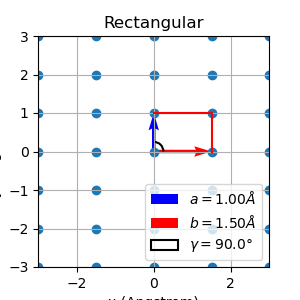

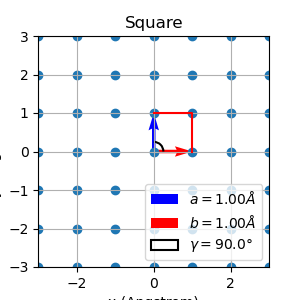

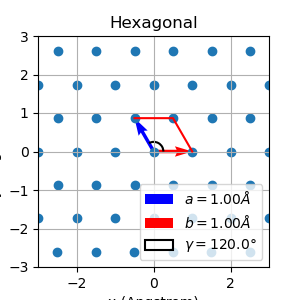

In [8]:
from helper import two_d_crystal_lattice
#here is where we show and label the four primitive 2D Bravais Lattices
two_d_crystal_lattice(1,1.5,80,title='Oblique')
two_d_crystal_lattice(1,1.5,90,title='Rectangular')
two_d_crystal_lattice(1,1,90,title='Square')
two_d_crystal_lattice(1,1,120,title='Hexagonal')

### SHORT RESPONSE QUESTIONS
1. How does the translational symmetry of a crystal simplify our calculations?
2. What is the difference between our theoretical crystal model lattice and true real world crystals? 
### ANSWER

1. Symmetry allows us to only need to consider a small subset of the crystal in our calculations, not the entire crystal lattice.
2. Our theoretical lattice assumes atoms arranged in perfectly periodic, infinite planes with identical spacing, but real crystals contain defects, strain, thermal vibrations, and finite-size domains.

<br/><br/>
  

## Part 2 - Bragg's Law and Diffraction by Reflection
Now that we have a better understanding of crystals and diffraction, let's see how they come together.

We don't observe diffraction in a crystal by light passing through gaps between atoms. Rather, we diffraction occurs in a crystal when light scatters off atoms. 

As with diffraction through a grating, we only need to consider light rays that travel parallel to one another for each angle. When we do this, we can treat the problem as involving _reflection_ instead of scattering.

To understand how diffraction works, we first need to understand the interference of light reflecting off two nearby points.

As with diffraction, we can write an equation to describe when constructive interference occurs: 
$$n\lambda{} = 2 d \cdot{}sin(\theta)$$
This $\theta$ has a slightly different meaning here. Notice also a new factor of two. As you explore diffraction through a lattice, pay close attention to definition of $\theta$ and try to deduce where the factor of two comes from.

### CODE
* Run the `interactive_reflection_plot()` function and explore how light reflecting off two points interferes.
* Run the `interactive_bragg_plot()` function and explore diffraction caused by scattering off a crystal lattice.

In [9]:
from helper import interactive_reflection_plot
interactive_reflection_plot()

interactive(children=(FloatSlider(value=0.0, description='x2', max=1.0, min=-1.0, step=0.01), FloatSlider(valu…

In [10]:
from helper import interactive_bragg_plot
interactive_bragg_plot()

interactive(children=(FloatSlider(value=35.5, description='theta', max=70.0, min=1.0), Output()), _dom_classes…

### SHORT RESPONSE QUESTIONS
1. If we define the y axis as bisecting the angle of reflection, how does the interference of light reflecting off two points depend on their separation along the x-axis and y-axis? Why?
2. In this case, is the variable $\theta$ relative to the y-axis or x-axis?
3. What information does diffraction provide about the structure of a crystal? For our example, how could we calculate the distance between atoms along the y-axis?
### ANSWER


1. With this definition of the x and y axis, the interference of light reflecting off two nearby points _only_ depends on their separation along the y axis and not at all on the x axis. This makes sense if we consider two points at (0,0) and (1,0): however much longer light travels after reflecting off the 0,0 point, it travels just that much longer before reflecting off the 1,0 point.
2. The angle theta here goes from the x axis, i.e. from the plane of reflection.
4. Diffraction can tell us about the distances between atoms in a crystal. In our example, we could determine the distance between atoms by shining an x-ray beam of a given wavelength through our crystal and measuring for which angles constructive interference occurs, using the equation $n\lambda{} = 2 d \cdot{}sin(\theta)$.

<br/><br/>

## Part 3 - Mirror Planes and HKL Indices 
Diffraction isn't limited to light reflecting off atoms arranged in a straight line. It occurs for _any set of parallel planes intersecting atoms_, as long as the plane spacing $d$ is large enought that $n\lambda{} = 2 d \cdot{}sin(\theta)$ has a nonzero solution. (Does this make sense in light of how reflected light rays interfere?)

These are called __mirror planes__, and we can classify them using the __Miller indices__ $h$, $k$, and $l$. These indices are $\frac{1}{b_{i}}$, where $b_i$ is the intercept along the $x$, $y$, or $z$ axis, respectively. If a plane doesn't intercept an axis, the index will be $0$, corresponding to $\frac{1}{\infty}$.

Recall the formula for constructive interference: 
$$\lambda{} = 2 d \cdot{}sin(\theta)$$
For a cubic lattice system, the distance between planes is given by:
$$d = \frac{a}{\sqrt{h^2 + k^2 + l^2}}$$
(Where $a$ is the unit cell dimension in the $x$, $y$, and $z$ directions)

### CODE
* Run the `interactive_mirror_plot()` function to explore how changing the Miller indices affects what sorts of planes you get, and the distances between them.

In [11]:
from helper import interactive_mirror_plot
interactive_mirror_plot()

interactive(children=(IntSlider(value=0, description='h', max=2, min=-2), IntSlider(value=0, description='k', …

### SHORT RESPONSE QUESTIONS
1. What type of crystal is this? how can you tell?
2. If our spectrum records of the intensity of light at angles $2\theta$, what variable from the bragg equation do these mirror planes relate to?
3. Based on your current understanding, what is X-ray diffraction actually measuring?
### ANSWER

1. This is a face centered cubic crystal. There is a cubic unit cell with an atom at each corner, but there is also an atom centered at each face on the cube.
2. These mirror planes are related to our spectrum because the distance between them is the "d" in $n\lambda = 2d\cdot{}sin(\theta)$, so given a certain wavelength of x-rays these will determine the angles of constructive interference we observe.
3. X-ray diffraction seems to be measuring the distances between parallel planes that contain atoms.

<br/><br/>


## Part 4 - Characteristic Absences and Interpreting XRD Spectra

Before diving deeper, let's clarify the distinction between powder and single-crystal X-ray diffraction (XRD). single-crystal XRD diffraction patterns are direction-dependent, varying with the X-ray beam's orientation relative to the crystal. The technique of powder XRD, however, involves shining the beam through many differently oriented samples of a crystal, resulting in an orientation-independent spectrum. Here, any set of mirror planes that produces constructive interference appears as concentric rings, with their angle from the center equal to $2\theta$.

Earlier, we examined mirror planes in a Face Centered Cubic (FCC) lattice, and their associated d and $2\theta$ values. You might expect that the XRD spectrum of this crystal would show peaks for every $2\theta$ value corresponding to the different combinations of $h$, $k$, and $l$. However, this is not the case.

We observe _selection rules_ based on the symmetries present in each crystal. For different types of lattices, certain peaks corresponding to different sets of $h$, $k$, and $l$ values will be present or absent. For example:
* __Simple cubic__: Peaks will be observed for all combinations of $h$, $k$, and $l$.
* __Face-centered cubic__: $h$, $k$, and $l$ must be either all even or all odd for a peak to be observed.
* __Body-centered cubic__: The sum $h + k + l$ must be even for a peak to be observed.

Therefore, by indexing the peaks on our spectrum by their $h$, $k$, and $l$ values, we gain insight not only into the interplanar spacings but also the crystal's symmetry.

### CODE
* Ensure you have the following files in the same folder as this notebook:
     * AuB2.xy 
     * AgB2.xy
     * NbTa.xy
     * Po.xy
* For AgB2, use the provided code to process your spectrum.
* Add comments explaining each line of code for this part.
* Create a function called `process_spectrum()` to turn the provided routine into reuseable code.
    * This function should accept one argument: a filename as a string.
    * It should plot the spectrum and print the cell parameter $a$ and the crystal classification.
    * It should return the pd.DataFrame object that the picked peaks, distances, and $hkl$ indices are stored in. 
* Use the `process_spectrum()` function you create to process the XRD spectra for AuB2, NbTa, and Po.
>To understand this process, it's helpful to know about the `pd.DataFrame` object. A `DataFrame` is like a spreadsheet. We use `pd.read_csv()` to load a file into a `DataFrame`, which organizes data by rows and labeled columns. You can access a column of data using the _subscript operator_ (angle brackets), similar to accessing an element in a list or dictionary. You can create columns in the same way.

In [12]:
#AuB2
wavelength = 1.54 #1.54 angstrom wavelength x-rays used for all these
spectrum = pd.read_csv('data/AgB2.xy',sep=r'\s+',header=None,names=['2theta','intensity','_'])
spectrum #typing a variable by itself in the last line of a block will show its contents

,2theta,intensity,_
0,1.00,0.00000,0.0
1,1.01,0.44387,0.0
2,1.02,0.43533,0.0
3,1.03,0.42703,0.0
4,1.04,0.41898,0.0
...,...,...,...
11895,119.95,0.03020,0.0
11896,119.96,0.03003,0.0
11897,119.97,0.02987,0.0
11898,119.98,0.02970,0.0


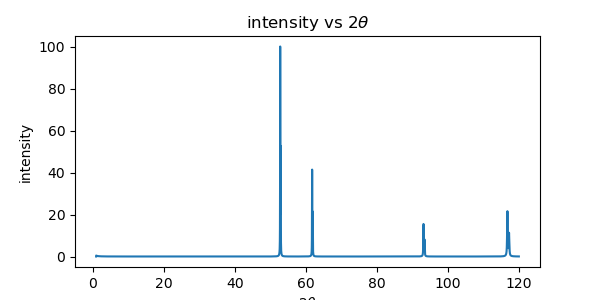

(<Figure size 600x300 with 1 Axes>,
 <Axes: title={'center': 'intensity vs $2\\theta$'}, xlabel='$2\\theta$', ylabel='intensity'>)

In [13]:
from helper import plot_spectrum
from helper import pick_peaks
from helper import calculate_distances
from helper import index_hkl
from helper import classify_cubic_spectra

plot_spectrum(spectrum['2theta'],spectrum['intensity'])

In [14]:
peaks = pick_peaks(spectrum['2theta'],spectrum['intensity'])
peaks

,2theta,intensity
0,52.81,100.00000
1,61.80,41.38197
2,93.14,15.48053
3,93.44,8.11418
4,116.77,21.58009


In [15]:
peaks['d'] = calculate_distances(peaks['2theta'],wavelength)
peaks

,2theta,intensity,d
0,52.81,100.00000,1.731452
1,61.80,41.38197,1.499393
2,93.14,15.48053,1.060292
3,93.44,8.11418,1.057675
4,116.77,21.58009,0.904191


In [16]:
peaks['hkl'], cell_param_a = index_hkl(peaks['d'],0)
peaks

,2theta,intensity,d,hkl
0,52.81,100.00000,1.731452,111
1,61.80,41.38197,1.499393,200
2,93.14,15.48053,1.060292,220
3,93.44,8.11418,1.057675,220
4,116.77,21.58009,0.904191,311


In [17]:
print(f'a: {cell_param_a:3f}')
classification = classify_cubic_spectra(peaks['hkl'])
print(f'Classification: {classification}')

a: 2.998964
Classification: face centered cubic


In [18]:
#define a function called process_spectrum() which accepts one argument: a filename.
    #process the spectrum in the space below, using the given functions
    #in the same order as before.

    #print the cell parameter a and the classification. 
    #return the DataFrame peaks containing peak data.
def process_spectrum(filename):
    wavelength = 1.54 #1.54 angstrom wavelength x-rays used for all these

    # read in the data
    spectrum = pd.read_csv('data/' + filename,sep=r'\s+',header=None,names=['2theta','intensity','~'])
    
    # use the given funcitons as above
    plot_spectrum(spectrum['2theta'],spectrum['intensity'])
    peaks = pick_peaks(spectrum['2theta'],spectrum['intensity'])
    peaks['d'] = calculate_distances(peaks['2theta'],wavelength)
    peaks['hkl'],a = index_hkl(peaks['d'])
    classification = classify_cubic_spectra(peaks['hkl'])
    
    
    print(f'a: {cell_param_a:3f}')
    print(f'Classification: {classification}')
    return peaks

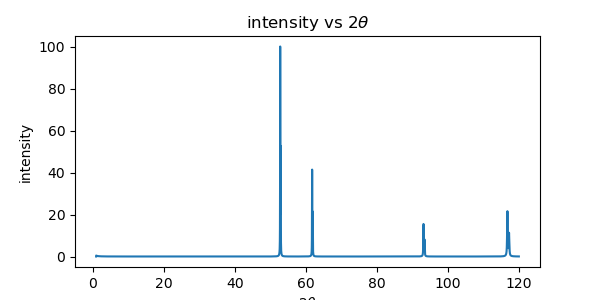

a: 2.998964
Classification: face centered cubic


,2theta,intensity,d,hkl
0,52.81,100.00000,1.731452,111
1,61.80,41.38197,1.499393,200
2,93.14,15.48053,1.060292,220
3,93.44,8.11418,1.057675,220
4,116.77,21.58009,0.904191,311


In [19]:
process_spectrum('AgB2.xy')

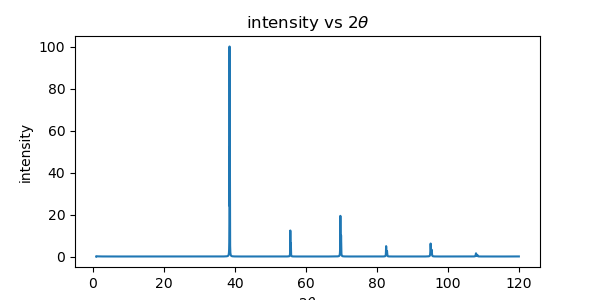

a: 2.998964
Classification: simple cubic


,2theta,intensity,d,hkl
0,38.55,100.00000,2.332608,100
1,55.66,12.37520,1.649353,110
2,55.81,6.38289,1.645275,110
3,69.75,19.35729,1.346653,111
4,82.63,4.92853,1.166316,200
5,95.15,6.17045,1.043133,210
6,95.45,3.22817,1.040646,210


In [20]:
process_spectrum('NbTa.xy')

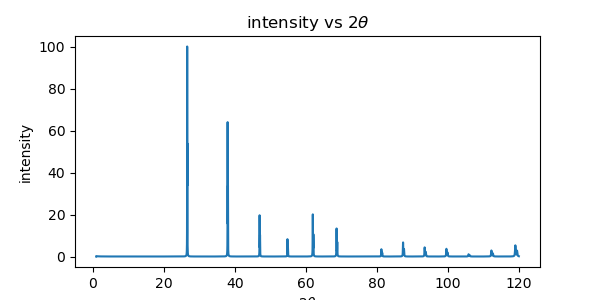

a: 2.998964
Classification: simple cubic


,2theta,intensity,d,hkl
0,26.63,100.00000,3.343400,100
1,38.01,63.97598,2.364497,110
2,47.01,19.63319,1.930652,111
3,54.85,8.24286,1.671779,200
4,54.99,4.33906,1.667854,200
5,61.99,20.05835,1.495252,210
6,68.68,13.33781,1.365000,211
7,68.87,6.93285,1.361697,211
8,81.29,3.45592,1.182123,220
9,87.39,6.69659,1.114619,221


In [21]:
process_spectrum('Po.xy')

### SHORT RESPONSE QUESTIONS
1. In terms of waves, what does intensity mean? 
2. How does the function classify each lattice? Look up the lattice type of each crystal - is the result correct? If it is incorrect, why might this be?
3. Once again - In your current understanding, what is X-ray diffraction measuring?
### ANSWER

1. Intensity measures how much energy arrives per unit area and is proportional to the square of the wave’s amplitude.
2. face centered cubic, face centered cubic, simple cubic, simple cubic. In actuality, hexagonal, hexagonal, body centered cubic, simple cubic. Only the result for Polonium is correct. Our algorithm would fail for the hexagonal structures because it is only designed with cubic structures in mind, though it is interesting it matches so well. It may have failed for the BCC lattice because of thresholds set too loose. __(it is ok if they don't come to the same conclusions)__
3. So far I understand that X-ray diffraction measures the distances between mirror planes present in the crystal, and also the symmetry elements of the crystal by which peaks are present or missing.

<br/><br/>
<br/><br/>

# Reflection

### SHORT RESPONSE QUESTIONS
1. How does the ability to visualize data and mathematical concepts interactively make it easier for us to examine patterns and learn?
10000000. How does examining a simplified version of a system (interference through two slits, reflection off two points) help us understand complex phenomena (diffraction through a grating or crystal)?
0. How does x-ray diffraction help us decipher the structure of crystalline solids?
### ANSWER

1. When we can examine a concept with a visualization, we can use different parts of our brain to understand the concept than we would reading something, and this can give us a more complete intutition for something. __(this question is purposely open ended, no right answer)__
2. Oftentimes, complex systems can be reduced to the interactions between many simple parts. If we understand eactly how each component works, it is much easier to understand how many of them will interact.
3. (with just the information covered in this notebook, we know that) XRD gives us geometric constraints including the presence of planes intersecting atoms and symmetry elements, which massively narrows down what the structure could possibly be.
4. It is perhaps more difficult to process one spectrum in Python than in excel, but it is much easier and less tedious to process multiple spectra with Python. (This one is pretty open ended, just want them to consider it as a motivation for learning)